# Telecom Churn Case Study

# 1. Loading dependencies & datasets

Lets start by loading our dependencies. We can keep adding any imports to this cell block, as we write mode and mode code.

In [1]:
#Loading required Libraries and importing Dataset
#Data Structures
import pandas as pd
import numpy as np
import re
import os



#Sklearn
from sklearn.impute import SimpleImputer
from sklearn.utils import resample
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score,f1_score,accuracy_score,roc_auc_score,roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer

#Plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

#Others
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
new_data = pd.read_csv("train.csv")
unseen = pd.read_csv("test.csv")
sample = pd.read_csv("sample.csv")
data_dict = pd.read_csv("data_dictionary.csv")

print(new_data.shape)
print(unseen.shape)
print(sample.shape)
print(data_dict.shape)

(69999, 172)
(30000, 171)
(30000, 2)
(36, 2)


In [3]:
# Checking data shape

data_dict.head()

,Acronyms,Description
0,CIRCLE_ID,Telecom circle area to which the customer belo...
1,LOC,Local calls within same telecom circle
2,STD,STD calls outside the calling circle
3,IC,Incoming calls
4,OG,Outgoing calls


# 2. Handling Missing data

lets analyse the missing data.

In [4]:
removedColumn = []
new_data['loc_og_t2o_mou'].value_counts()
new_data['loc_og_t2o_mou'].value_counts().iloc[0]>new_data.shape[0]*0.8


True

In [5]:
for i in new_data.columns:
    if((new_data[i].isnull().sum())>=(new_data.shape[0]*0.4)):
        if(i!='churn_probability'):
            new_data.drop(columns=i,axis=1,inplace=True)
            removedColumn.append(i)
    elif ((new_data[i].value_counts().iloc[0])>(new_data.shape[0])*0.95):
        if(i!='churn_probability'):
            print(i)
            new_data.drop(columns=i,axis=1,inplace=True)
            removedColumn.append(i)

circle_id
loc_og_t2o_mou
std_og_t2o_mou
loc_ic_t2o_mou
last_date_of_month_6
last_date_of_month_7
last_date_of_month_8
std_og_t2c_mou_6
std_og_t2c_mou_7
og_others_7
std_ic_t2o_mou_6
std_ic_t2o_mou_7
sachet_3g_6
sachet_3g_7
sachet_3g_8


In [6]:
new_data.shape

(69999, 127)

In [7]:
checkNull = lambda : new_data.isnull().sum().sort_values(ascending = False)

In [8]:
checkNull()

loc_ic_t2f_mou_8     3703
loc_og_t2f_mou_8     3703
loc_og_mou_8         3703
std_og_t2t_mou_8     3703
std_og_t2m_mou_8     3703
                     ... 
total_rech_amt_8        0
max_rech_amt_6          0
max_rech_amt_7          0
max_rech_amt_8          0
churn_probability       0
Length: 127, dtype: int64

In [9]:
# new_data = new_data[~(new_data['loc_ic_t2t_mou_8'].isnull())]

In [10]:
checkNull()

loc_ic_t2f_mou_8     3703
loc_og_t2f_mou_8     3703
loc_og_mou_8         3703
std_og_t2t_mou_8     3703
std_og_t2m_mou_8     3703
                     ... 
total_rech_amt_8        0
max_rech_amt_6          0
max_rech_amt_7          0
max_rech_amt_8          0
churn_probability       0
Length: 127, dtype: int64

In [11]:
# new_data = new_data[~(new_data['loc_ic_t2f_mou_6'].isnull())]

In [12]:
checkNull()

loc_ic_t2f_mou_8     3703
loc_og_t2f_mou_8     3703
loc_og_mou_8         3703
std_og_t2t_mou_8     3703
std_og_t2m_mou_8     3703
                     ... 
total_rech_amt_8        0
max_rech_amt_6          0
max_rech_amt_7          0
max_rech_amt_8          0
churn_probability       0
Length: 127, dtype: int64

In [13]:
# new_data = new_data[~(new_data['date_of_last_rech_8'].isnull())]

In [14]:
checkNull()

loc_ic_t2f_mou_8     3703
loc_og_t2f_mou_8     3703
loc_og_mou_8         3703
std_og_t2t_mou_8     3703
std_og_t2m_mou_8     3703
                     ... 
total_rech_amt_8        0
max_rech_amt_6          0
max_rech_amt_7          0
max_rech_amt_8          0
churn_probability       0
Length: 127, dtype: int64

In [15]:
# new_data = new_data[~(new_data['std_ic_t2m_mou_7'].isnull())]

In [16]:
checkNull()

loc_ic_t2f_mou_8     3703
loc_og_t2f_mou_8     3703
loc_og_mou_8         3703
std_og_t2t_mou_8     3703
std_og_t2m_mou_8     3703
                     ... 
total_rech_amt_8        0
max_rech_amt_6          0
max_rech_amt_7          0
max_rech_amt_8          0
churn_probability       0
Length: 127, dtype: int64

In [17]:
# new_data = new_data[~(new_data['date_of_last_rech_6'].isnull())]

In [18]:
for i,j in zip(new_data.columns,new_data.dtypes):
    if(j=='object'):
        new_data.drop(columns=i,axis=1,inplace=True)
        removedColumn.append(i)

In [19]:
# new_data = new_data[~(new_data['date_of_last_rech_7'].isnull())]
imputer = SimpleImputer(missing_values=np.NaN, strategy='mean')
# imputing Missing NaN/Null values with mean of the column cont..

missing_data_percent = new_data.isnull().any()
impute_cols = missing_data_percent[missing_data_percent.gt(0)].index
impute_cols
new_data[impute_cols] = imputer.fit_transform(new_data[impute_cols])
# new_data['id']

In [20]:
#checking how much missing data is present

checkNull()

id                   0
std_ic_mou_7         0
ic_others_8          0
ic_others_7          0
ic_others_6          0
                    ..
std_og_t2m_mou_8     0
std_og_t2m_mou_7     0
std_og_t2m_mou_6     0
std_og_t2t_mou_8     0
churn_probability    0
Length: 124, dtype: int64

In [21]:
for i,j in zip(new_data.columns,new_data.dtypes):
    if(j=='object'):
        new_data.drop(columns=i,axis=1,inplace=True)
        removedColumn.append(i)

In [22]:
new_data.drop(columns='id',axis=1,inplace=True)
removedColumn.append(i)

# 3. Data Visualization (Exploratory Data Analysis and Preprocessing)

In [23]:
new_data.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,...,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,283.134365,278.185912,278.858826,133.153275,133.894438,132.978257,198.874771,197.153383,196.543577,9.765435,...,0.441406,0.449492,0.075815,0.077730,0.081958,1220.639709,68.108597,65.935830,60.07674,0.101887
std,334.213918,344.366927,351.924315,293.972404,305.244261,303.534603,310.491042,316.232126,315.400354,56.228580,...,1.651012,1.632450,0.358905,0.383189,0.381821,952.426321,269.328659,267.899034,257.22681,0.302502
min,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,93.581000,86.714000,84.095000,8.060000,7.260000,7.360000,36.880000,33.980000,34.390000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,197.484000,191.588000,192.234000,37.730000,35.690000,36.790000,103.830000,98.580000,101.680000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,370.791000,365.369500,369.909000,133.153275,133.894438,132.978257,223.540000,218.350000,216.410000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1813.000000,0.000000,0.000000,0.00000,0.000000
max,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,10752.560000,8362.360000,7043.980000,14007.340000,2850.980000,...,48.000000,44.000000,9.000000,16.000000,16.000000,4337.000000,12916.220000,9165.600000,11166.21000,1.000000


Text(0.5, 1.0, 'churn_probability data')

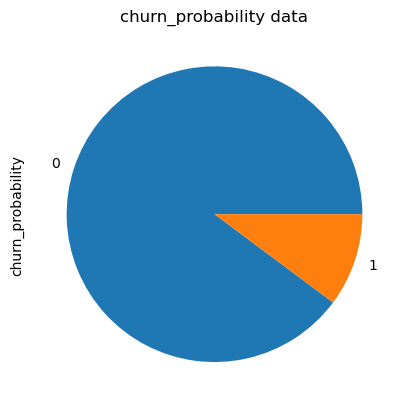

In [24]:
#Building a Piechart graph to see the spread of the data in the dataset

new_data['churn_probability'].value_counts().plot.pie()
plt.title("churn_probability data")

## We can clearly visualize that there is big implace in data to overcome we can do reshaping the data or change the threshold

<Axes: >

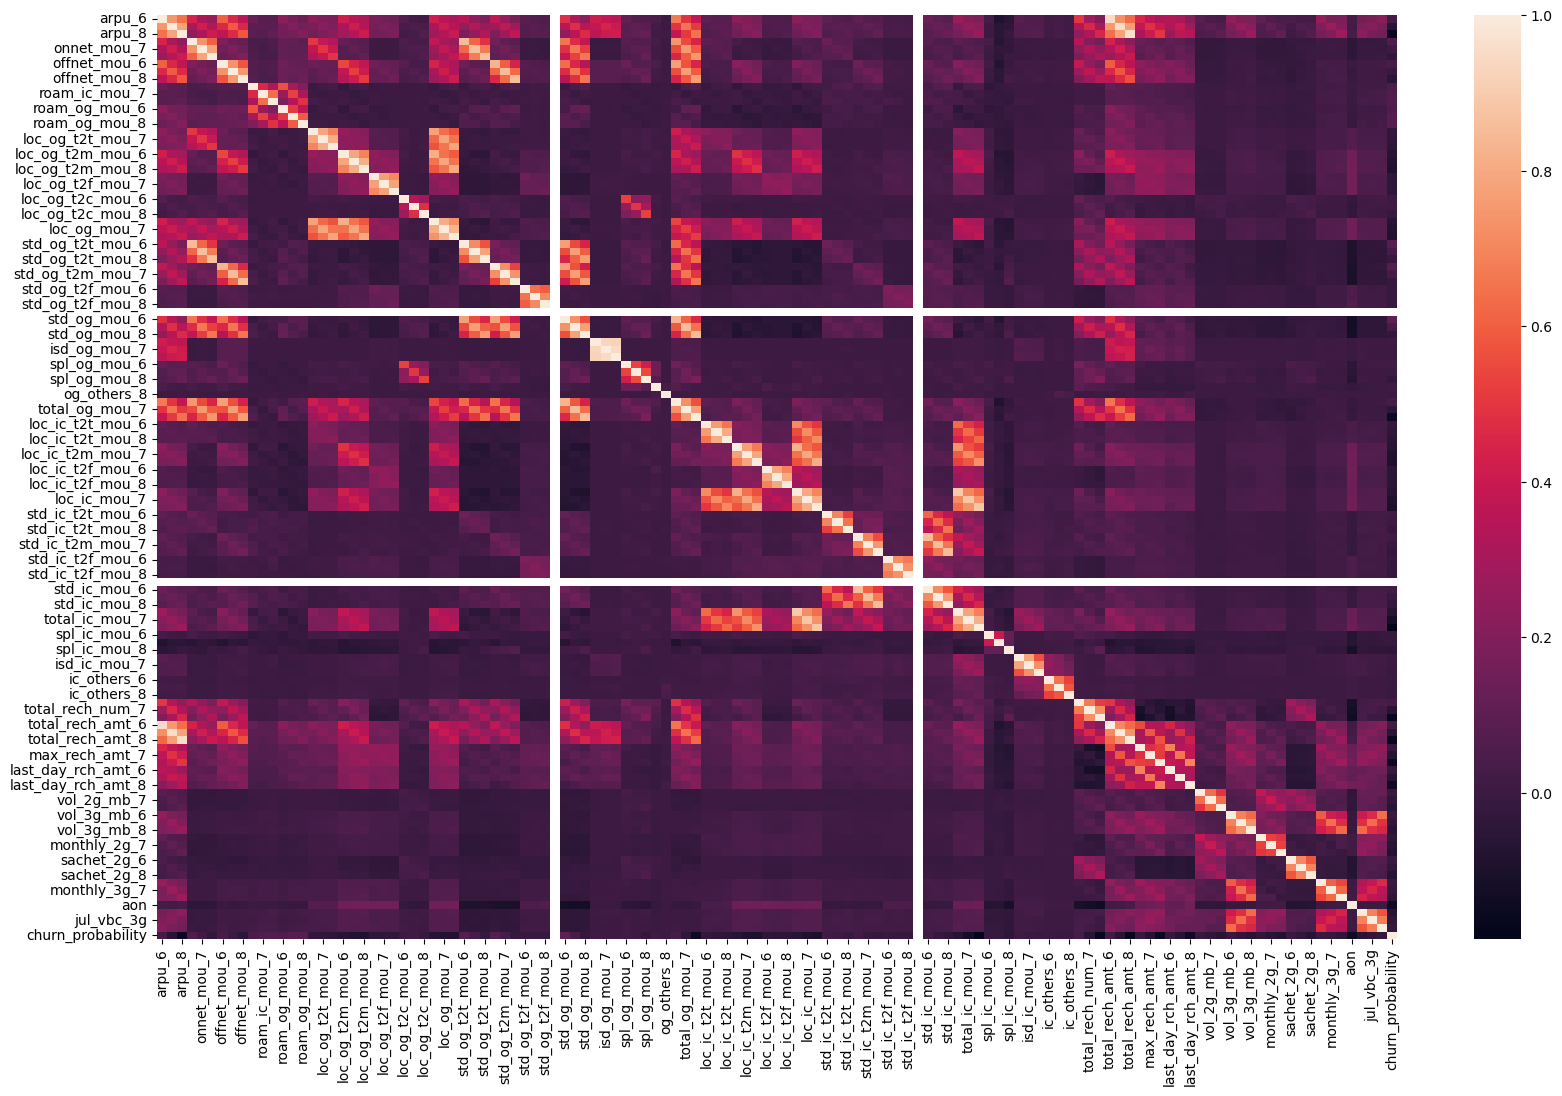

In [25]:
# Building Heatmap to check Corelation between Perdictor variables

plt.figure(figsize=(20,12))
sns.heatmap(new_data.corr())

In [26]:
# Creating X and y variable with x containing all predictor variables and y containing target variable

X= new_data.drop(columns='churn_probability')
y = new_data['churn_probability']
print(X.shape)
print(y.shape)

(69999, 122)
(69999,)


In [27]:
X.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,...,0,0,0,0,0,0,1958,0.0,0.0,0.0
1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,...,0,0,0,0,1,0,710,0.0,0.0,0.0
2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,...,0,0,0,0,0,0,882,0.0,0.0,0.0
3,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,0.00,...,0,0,0,0,0,0,982,0.0,0.0,0.0
4,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,53.64,...,7,6,6,0,0,0,647,0.0,0.0,0.0


In [28]:
correlationData = new_data.corr().unstack().sort_values(kind= "quicksort", ascending=False) 
correlationData = correlationData[(correlationData!=1) & (correlationData>0.95)].index

In [29]:
correlationData

MultiIndex([('total_rech_amt_8',           'arpu_8'),
            (          'arpu_8', 'total_rech_amt_8'),
            ('total_rech_amt_7',           'arpu_7'),
            (          'arpu_7', 'total_rech_amt_7'),
            ('total_rech_amt_6',           'arpu_6'),
            (          'arpu_6', 'total_rech_amt_6')],
           )

### Above are listed as High correlation columns

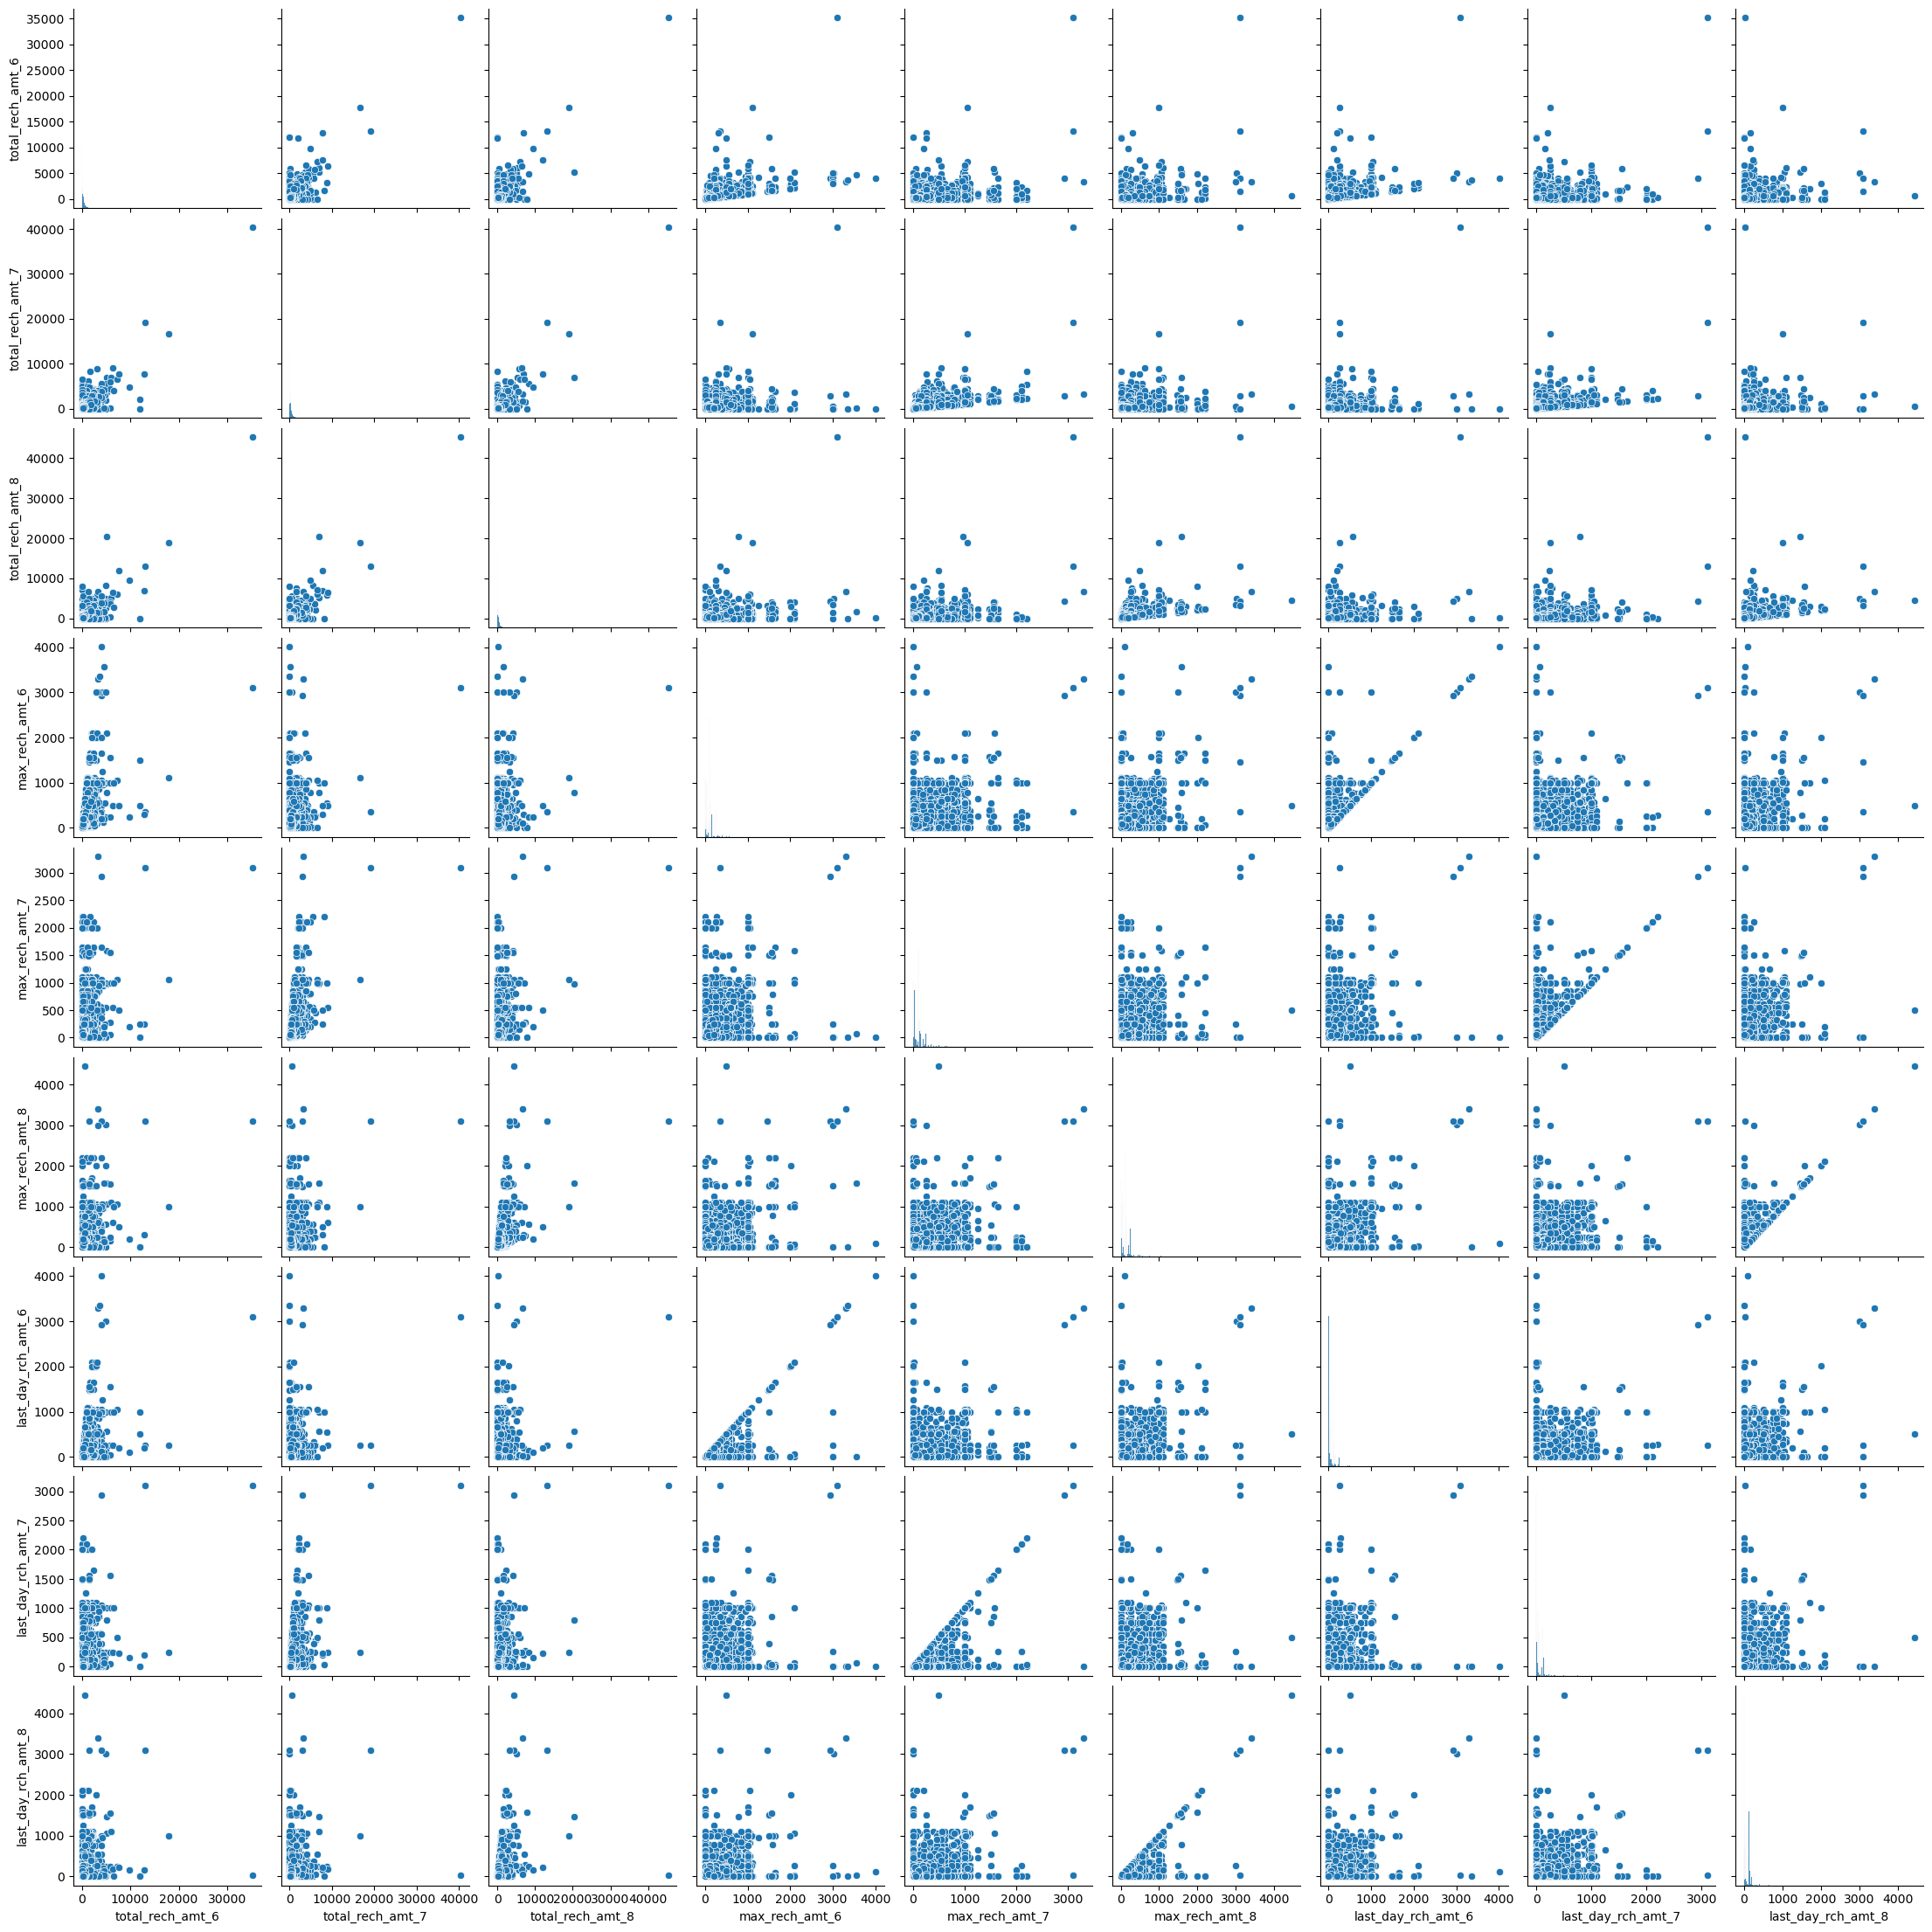

In [30]:
# Lets visualize the amount column

sns.pairplot(new_data.loc[:,[i for i in new_data.columns if re.search('amt',i)]], diag_kind="hist")

([<matplotlib.axis.XTick at 0x235c6fe50d0>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8')])

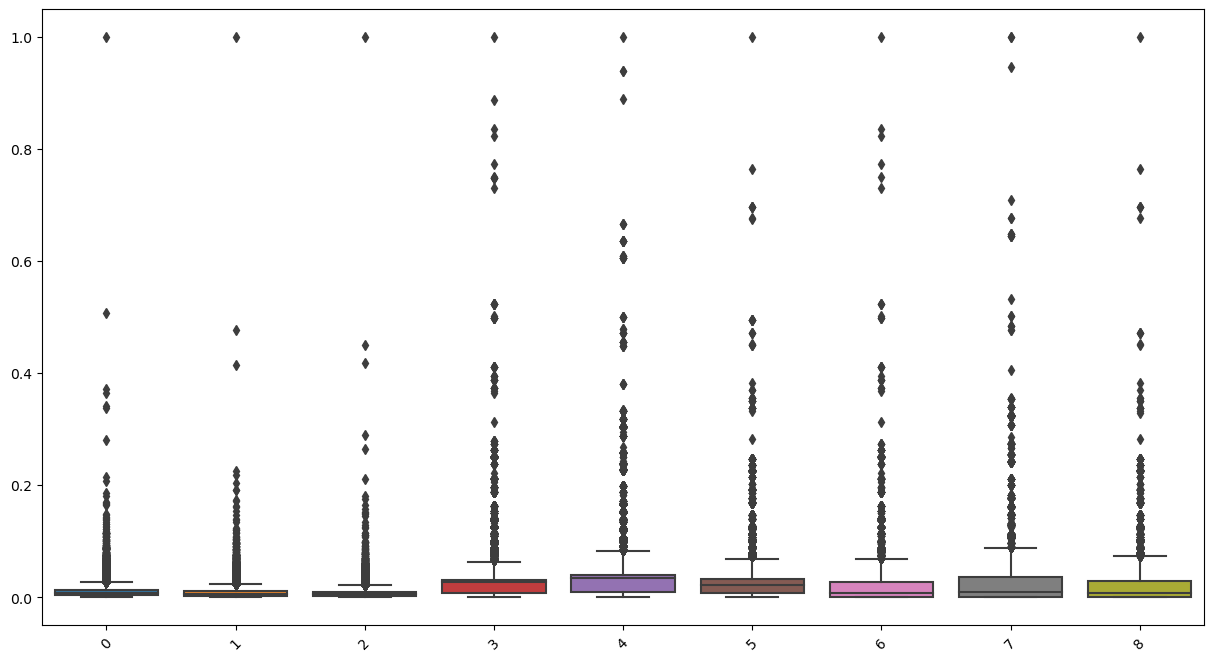

In [31]:
#Scaling Preddictor variables with MinMaxScaler and Building a boxplot graph to see the spread of the data in the dataset

scalar1 = MinMaxScaler()
scalar1.fit_transform(new_data.loc[:,[i for i in new_data.columns if re.search('amt',i)]])

plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.boxplot(data = scalar1.fit_transform(new_data.loc[:,[i for i in new_data.columns if re.search('amt',i)]]))
plt.xticks(ticks=range(0,9),label=[i for i in new_data.columns if re.search('amt',i)])
           

In [32]:
# Building test and train data with 80-20 split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((55999, 122), (14000, 122), (55999,), (14000,))

<Axes: xlabel='churn_probability', ylabel='Count'>

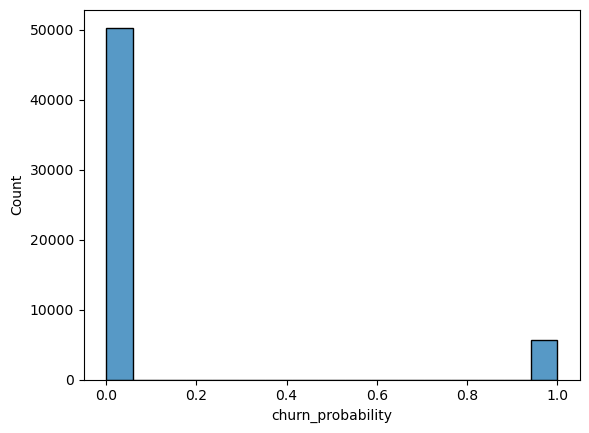

In [33]:
# Building a Histplot to check the balance between 0 and 1 value of churn probability

sns.histplot(y_train)

# Doubt

In [34]:
scalar = StandardScaler()
new_data_scaled = scalar.fit_transform(X_train)

In [35]:
!pip install xgboost

In [36]:
def checkThreshold(xb):
    thresholds = []
    roc_auc_scores= []
    precision_scores= []
    recall_scores=[]
    f1_scores = []
    accuracy_scores = []
    for i in np.arange(0,10):
        y_pred_threshold = np.array((xb.predict_proba(scalar.transform(X_test))[:,1]>(i/10)).astype(int))
        thresholds.append(i/10)
        accuracy_scores.append(accuracy_score(y_test,y_pred_threshold))
        f1_scores.append(f1_score(y_test,y_pred_threshold))
        roc_auc_scores.append(roc_auc_score(y_test,y_pred_threshold))
        precision_scores.append(precision_score(y_test,y_pred_threshold))
        recall_scores.append(recall_score(y_test,y_pred_threshold))
    return pd.DataFrame({'thresholds':thresholds,'accuracy_scores':accuracy_scores,'f1_scores':f1_scores,'roc_auc_scores':roc_auc_scores,'precision_scores':precision_scores,'recall_scores':recall_scores})

In [37]:
params = {
        'min_child_weight': [7, 8],#less
        'gamma': [3.6,3.5],#hight
        'subsample': [0.7, 0.6],#less
        'colsample_bytree': [0.5,0.4],#high
        'max_depth': [12,11],#high
        'learning_rate':[0.08,0.09],#less
        'n_estimators':[95,100],#low
        'scale_pos_weight':[1.2,1.3],#high
        'reg_lambda':[10,9]#less
}


# 4. Feature engineering and selection

In [38]:
# Building Random forest classifier model and fitting the data to do feature importance

rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
rf.fit(new_data_scaled, y_train)

RandomForestClassifier(n_jobs=-1)

In [40]:
# Creating a dataframe to store all column names in col and its corresponding importance in the importance column and sorting it
# by descending

feature_importances = pd.DataFrame({'col':X.columns, 'importance':rf.feature_importances_})
feature_importances

,col,importance
0,arpu_6,0.009150
1,arpu_7,0.010555
2,arpu_8,0.044897
3,onnet_mou_6,0.007988
4,onnet_mou_7,0.007278
...,...,...
117,monthly_3g_8,0.000973
118,aon,0.012588
119,aug_vbc_3g,0.002457
120,jul_vbc_3g,0.002079


In [41]:
# sorting it by descending 

topTen = feature_importances.sort_values(by = 'importance', ascending=False).iloc[0:10,:]
topTen

,col,importance
81,total_ic_mou_8,0.089618
50,og_others_8,0.049693
2,arpu_8,0.044897
11,roam_ic_mou_8,0.037977
53,total_og_mou_8,0.037336
96,total_rech_amt_8,0.033609
14,roam_og_mou_8,0.027871
45,isd_og_mou_8,0.024548
65,loc_ic_mou_8,0.023999
99,max_rech_amt_8,0.018340


<Axes: xlabel='col', ylabel='importance'>

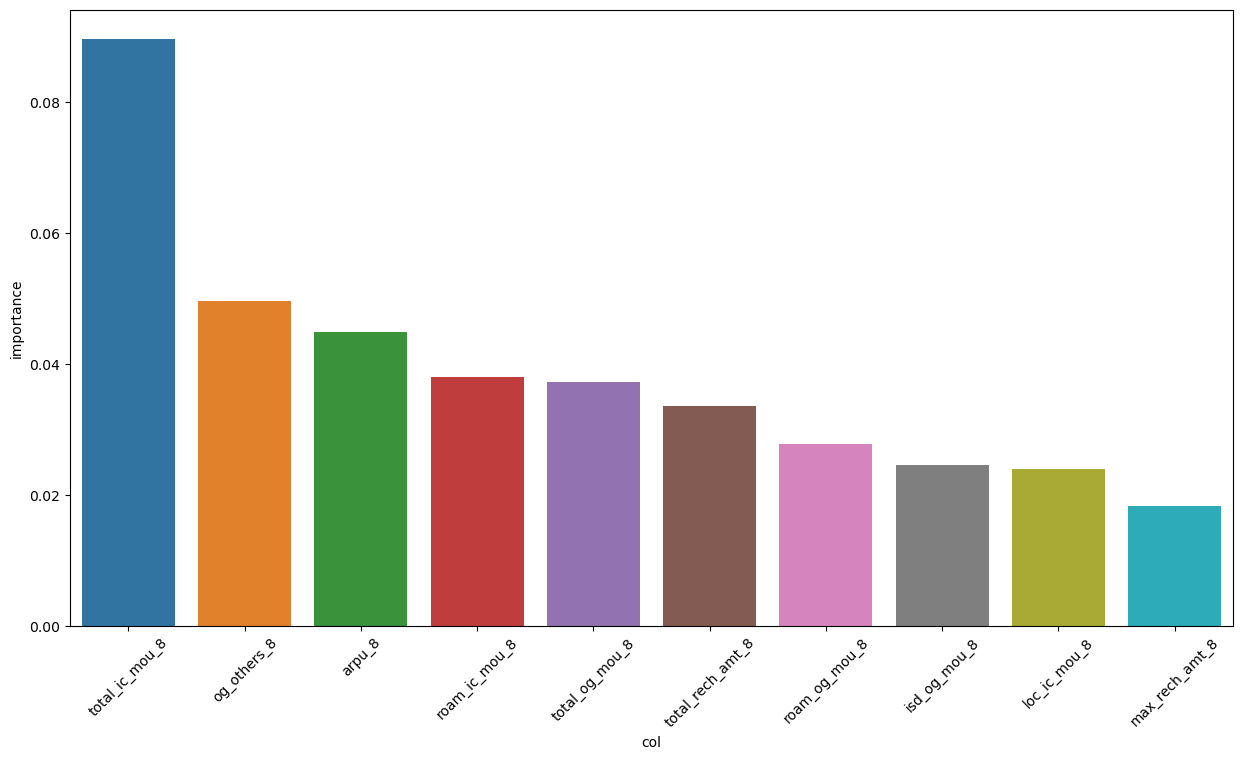

In [42]:
# Plotting a Barplot between col column and importance

plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.barplot(data = topTen,x = 'col', y = 'importance')

# 5. Building the prediction model.

### 1.0 Random Forest model

In [43]:
# building Random forest classifier model and fitting the data to do feature importance

rand_search  = RandomizedSearchCV(estimator=XGBClassifier(random_state= 42),param_distributions=params,scoring='roc_auc',cv=4,verbose=1,n_jobs=-1)

In [44]:
rand_search.fit(new_data_scaled,y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearchCV(cv=4,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.5, 0.4],
                                        'gamma': [3.6, 3.5],
                                        'learning_rate': [0.08, 0.09],
                                        'max_depth': [12, 11],
                                        'min_child_weight': [7, 8],
                                        'n_estimators': [95, 100],
                                        'reg_lambda': [10, 9],
                                        'scale_pos_weight': [1.2, 1.3],
                                        'subsample': [0.7, 0.6]},
                   scoring='roc_auc', verbose=1)

In [45]:
rand_search.best_params_

{'subsample': 0.6,
 'scale_pos_weight': 1.3,
 'reg_lambda': 10,
 'n_estimators': 95,
 'min_child_weight': 8,
 'max_depth': 11,
 'learning_rate': 0.09,
 'gamma': 3.6,
 'colsample_bytree': 0.5}

In [46]:
est = rand_search.best_estimator_

In [47]:
checkThreshold(est)

,thresholds,accuracy_scores,f1_scores,roc_auc_scores,precision_scores,recall_scores
0,0.0,0.103714,0.187937,0.500000,0.103714,1.000000
1,0.1,0.887214,0.617583,0.883184,0.476279,0.878099
2,0.2,0.925429,0.693842,0.876488,0.604188,0.814738
3,0.3,0.936714,0.712897,0.857510,0.673195,0.757576
4,0.4,0.940429,0.713402,0.840702,0.711934,0.714876
5,0.5,0.940286,0.696662,0.816871,0.736196,0.661157
6,0.6,0.940143,0.677444,0.792431,0.767888,0.606061
7,0.7,0.936857,0.630435,0.752230,0.802128,0.519284
8,0.8,0.931000,0.544769,0.695370,0.862687,0.398072
9,0.9,0.914500,0.314040,0.593596,0.935154,0.188705


In [48]:
roc_auc_score(y_test,est.predict(scalar.transform(X_test)))
roc_auc_score(y_test,est.predict(scalar.transform(X_test)))

0.8168711486733917

In [49]:
np.array((est.predict_proba(X_test)[:,1]>=0.1).astype(int))

array([1, 0, 1, ..., 1, 1, 1])

### 2.0 Decision Tree classifier 

In [50]:
dt = DecisionTreeClassifier(max_depth=5,max_features=10,min_samples_leaf=36)

In [51]:
pca = PCA(0.95)
X_train_pca = pca.fit_transform(new_data_scaled)

In [52]:
dt.fit(X_train_pca,y_train)

DecisionTreeClassifier(max_depth=5, max_features=10, min_samples_leaf=36)

In [53]:
def checkThresholdForPCA(xb):
    thresholds = []
    roc_auc_scores= []
    precision_scores= []
    recall_scores=[]
    f1_scores = []
    accuracy_scores = []
    for i in np.arange(0,10):
        y_pred_threshold = np.array((xb.predict_proba(pca.transform(scalar.transform(X_test)))[:,1]>(i/10)).astype(int))
        thresholds.append(i/10)
        accuracy_scores.append(accuracy_score(y_test,y_pred_threshold))
        f1_scores.append(f1_score(y_test,y_pred_threshold))
        roc_auc_scores.append(roc_auc_score(y_test,y_pred_threshold))
        precision_scores.append(precision_score(y_test,y_pred_threshold))
        recall_scores.append(recall_score(y_test,y_pred_threshold))
    return pd.DataFrame({'thresholds':thresholds,'accuracy_scores':accuracy_scores,'f1_scores':f1_scores,'roc_auc_scores':roc_auc_scores,'precision_scores':precision_scores,'recall_scores':recall_scores})

In [54]:
checkThresholdForPCA(dt)

,thresholds,accuracy_scores,f1_scores,roc_auc_scores,precision_scores,recall_scores
0,0.0,0.103714,0.187937,0.500000,0.103714,1.000000
1,0.1,0.715429,0.339303,0.710617,0.223460,0.704545
2,0.2,0.829286,0.380829,0.686435,0.305233,0.506198
3,0.3,0.892286,0.262231,0.579376,0.452703,0.184573
4,0.4,0.899571,0.171967,0.546291,0.593496,0.100551
5,0.5,0.899571,0.171967,0.546291,0.593496,0.100551
6,0.6,0.899571,0.171967,0.546291,0.593496,0.100551
7,0.7,0.896286,0.000000,0.500000,0.000000,0.000000
8,0.8,0.896286,0.000000,0.500000,0.000000,0.000000
9,0.9,0.896286,0.000000,0.500000,0.000000,0.000000


### 3.0 GradientBoost with Gridsearch cv

In [66]:
scoring = {'accuracy': make_scorer(accuracy_score)}
parameters = {
    "learning_rate": [0.01, 0.025, 0.05, 0.1, 0.15],
    "min_samples_split": np.arange(5, 13, 3),
    "min_samples_leaf": np.arange(5, 15, 3),
    "max_depth":np.arange(6,11,2),
    "criterion": ["friedman_mse"],
    "subsample":[0.1,0.3,0.5],
    "n_estimators":[50,150]
    }
#passing the scoring function in the GridSearchCV
clf = RandomizedSearchCV(GradientBoostingClassifier(), parameters,scoring=scoring,refit=False,cv=4, n_jobs=-1,verbose=1)

In [ ]:
clf.fit(new_data_scaled,y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


In [ ]:
checkThreshold(clf)

### 4.0

In [ ]:
unsampled  =resample(new_data[new_data['churn_probability']==1],
        replace=True,
        n_samples=int(new_data[new_data['churn_probability']==0].shape[0]/10),random_state=42)


In [ ]:
new_unsampled = pd.concat((new_data[new_data['churn_probability']==0],unsampled),axis=0)

In [ ]:
X= new_unsampled.drop(columns='churn_probability',axis=1)
y = new_unsampled['churn_probability']

In [ ]:
X.shape,y.shape

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
X_train_scaled = scalar.fit_transform(X_train)

In [ ]:
xgb = XGBClassifier(subsample= 0.6,
 scale_pos_weight= 1.3,
 reg_lambda= 10,
 n_estimators= 95,
 min_child_weight= 7,
 max_depth= 12,
 learning_rate=0.08,
 gamma= 3.5,
 colsample_bytree= 0.5)

In [ ]:
xgb.fit(X_train_scaled,y_train)

In [ ]:
checkThreshold(xgb)

### 5.0 GBM Classifier with GridSearchCV

In [ ]:
# building the model

gb = GradientBoostingClassifier(random_state=100)

In [ ]:
#Different parameters

params = {
    'n_estimators' : [30, 40, 50],
    'max_features' : [11, 12, 13, 14],
    'max_depth' : [ 7, 8, 9, 10],
    'min_samples_leaf' : [10, 15, 20, 25],
}

In [ ]:
# Building the grid

grid = GridSearchCV(estimator=gb, 
                   param_grid=params,
                   cv=4, n_jobs=-1, verbose=1, scoring='roc_auc')

In [ ]:
# fitting the model

grid.fit(new_data_scaled, y_train)

In [ ]:
# taking best model from the fitted models

grid.best_params_

In [ ]:
checkThreshold(grid.best_estimator_)

# 6. Evaluating the model on Unseen test data and creating submission file.

In [ ]:
# Creating a new dataframe and Imputing the unseen data to get it ready for the model

id = unseen['id']

In [ ]:
new_unseen =  unseen.loc[:,[i for i in unseen.columns if i not in removedColumn]]

In [ ]:
new_unseen.shape
new_unseen.drop(columns='id',axis=1,inplace=True)

In [ ]:
# checking if the unseen data still has any missing values

for i in new_unseen.columns:
    if new_unseen[i].isnull().sum()>0:
        new_unseen[i].fillna(new_unseen[i].mean(),inplace= True)
new_unseen.isnull().sum().sort_values(ascending=False)

In [ ]:
# Scaling the unseen data

new_unseen_scaled =  scalar.transform(new_unseen)

In [ ]:

np.array((est.predict_proba(new_unseen_scaled)[:,1]>=0.3).astype(int))

In [ ]:
# predicting the churn probability from the data and Submission file - Used to submit in Kaggle and upgrad platform.

pd.DataFrame({'id':id,'churn_probability':np.array((est.predict_proba(new_unseen_scaled)[:,1]>=0.3).astype(int))}).set_index('id').to_csv('submission.csv')